In [ ]:
import datetime
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from datetime import datetime
import pandas as pd
import os

In [ ]:
#Mount Gdrive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Set current working directory
%cd /content/drive/My Drive/MLCR/

/content/drive/My Drive/MLCR


In [ ]:
import os
os.getcwd()

'/content/drive/My Drive/MLCR'

In [ ]:
import os
print(os.listdir("../MLCR"))

['Siddhi_Joshi_20070122513_Grp_11_Regression.pdf', 'Siddhi_Joshi_20070122513_Grp_11_Classification.pdf', 'Mini_Project_Statment_Grp_12_Harshvardhan.docx', 'Mini_Project_Statment_Grp_12_Harshvardhan.pdf', 'Mini_Project_Statment_Grp_12_Siddhi_Joshi_MLCR.docx', 'Mini_Project_Statment_Grp_12_Siddhi_Joshi_MLCR.pdf', 'Siddhi_Joshi_Electricity_Data.xlsx', 'siddhi_household_power_consumption.txt', 'Nandakumar_household_power_comsumption.txt', 'Harsha_household _power_consumption.rtf', 'household_power_consumption.txt', 'Harsh_household_power_consumption.txt', 'household_daily.csv']


In [ ]:
df = pd.read_csv('../MLCR/siddhi_household_power_consumption.txt',sep = ';',
                parse_dates={'dt':['Date','Time']},
                infer_datetime_format=True,
                low_memory=False, na_values=['nan','?'],
                index_col='dt')

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
24/01/2021 17:22:00,3.588,0.502,233.47,23.00,0.0,1.00,17.00
24/02/2021 17:23:00,289.600,0.213,269.09,22.12,0.0,3.00,7.39
24/03/2021 17:24:00,4.327,0.277,238.32,56.48,0.0,3.44,11.82
24/04/2021 17:25:00,4.104,0.399,253.43,16.26,0.0,7.34,10.36
24/05/2021 17:26:00,4.110,0.104,112.00,23.01,0.0,10.36,11.84


In [ ]:
daily_data=data.resample('D').sum()

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 24/01/2021 17:22:00 to 24/12/2021 17/33/00
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Global_active_power     12 non-null     float64
 1    Global_reactive_power  12 non-null     float64
 2    Voltage                12 non-null     float64
 3    Global_intensity       12 non-null     float64
 4    Sub_metering_1         12 non-null     float64
 5   Sub_metering_2          12 non-null     float64
 6   Sub_metering_3          12 non-null     float64
dtypes: float64(7)
memory usage: 768.0+ bytes


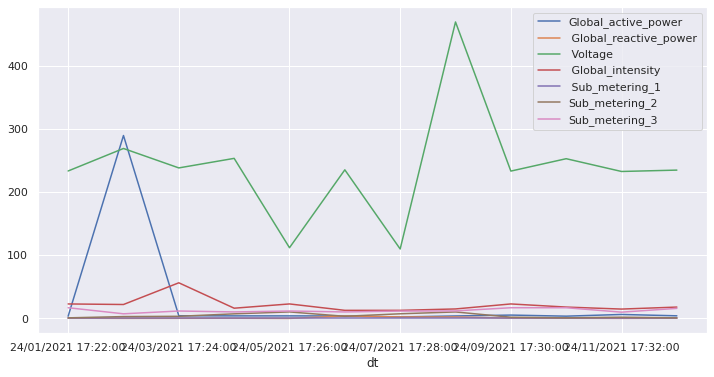

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
len(df)

12

In [ ]:
train = df.iloc[:156]
test = df.iloc[156:]

In [ ]:
df.head(),df.tail()

(                     Global_active_power   Global_reactive_power   Voltage  \
 dt                                                                           
 24/01/2021 17:22:00                3.588                   0.502    233.47   
 24/02/2021 17:23:00              289.600                   0.213    269.09   
 24/03/2021 17:24:00                4.327                   0.277    238.32   
 24/04/2021 17:25:00                4.104                   0.399    253.43   
 24/05/2021 17:26:00                4.110                   0.104    112.00   
 
                       Global_intensity   Sub_metering_1  Sub_metering_2  \
 dt                                                                        
 24/01/2021 17:22:00              23.00              0.0            1.00   
 24/02/2021 17:23:00              22.12              0.0            3.00   
 24/03/2021 17:24:00              56.48              0.0            3.44   
 24/04/2021 17:25:00              16.26              0.0         

In [ ]:
#You may save the CSV file according to the days
df.to_csv("household_daily.csv")

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

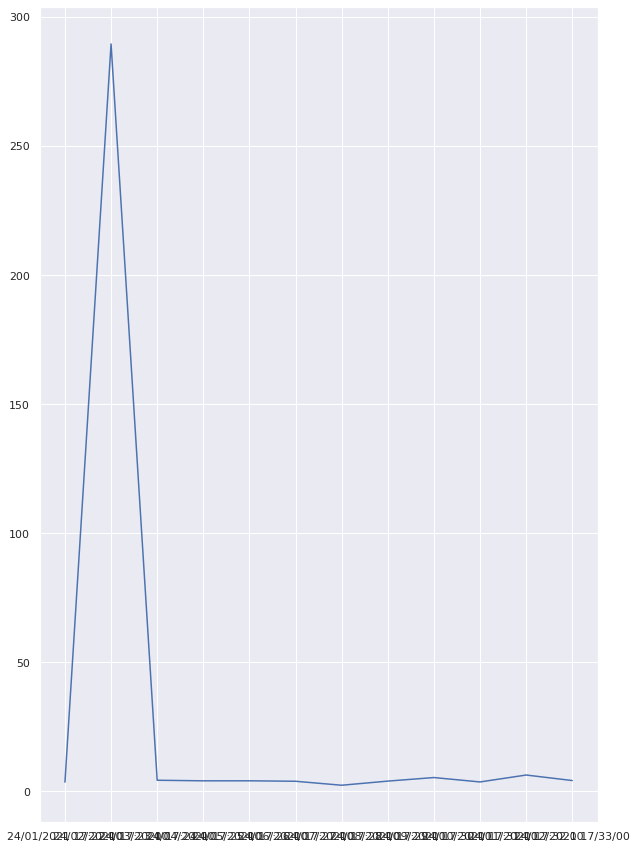

In [ ]:
plt.figure(figsize=(10,15))
plt.plot(df['Global_active_power'])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def forecasts(act,pred):
    scores=[]
    for i in range(act.shape[1]):
        mse=mean_squared_error(act[:,i],pred[:,i])
        rmse=np.sqrt(mse)
        scores.append(rmse)
    s=0
    for row in range(act.shape[0]):
        for col in range(act.shape[1]):
            s+=(act[row,col]-pred[row,col])**2
    score=np.sqrt(s/(act.shape[0]*act.shape[1]))
    return score,scores

In [ ]:
df.shape

(12, 7)

In [ ]:
def split(data):
    train,test=data[1:-328],data[-328:-6]
    train=np.array(np.split(train,len(train)/7))
    test=np.array(np.split(test,len(test)/7))
    return train,test

In [ ]:
def summarized_scores(name,score,scores):
    s_scores=', '.join(['%.1f'%s for s in scores])
    print('%s:[%.3f] %s'%(name,score,s_scores))

In [ ]:
def to_supervized(train,n_in,n_out):
    data=train.reshape((train.shape[0]*train.shape[1],train.shape[2]))
    X,y=[],[]
    in_start=0
    for i in range(len(data)):
        in_end=in_start+n_in
        out_end=in_end+n_out
        if out_end<len(data):
            x_in=data[in_start:in_end,0]
            x_in=x_in.reshape((len(x_in),1))
            X.append(x_in)
            y.append(data[in_end:out_end,0])
        in_start+=1
    return np.array(X),np.array(y)

In [ ]:
def build_model(train,n_input):
    train_x,train_y=to_supervized(train,n_input,7)
    verbose=0
    epochs=70
    batch_size=16
    n_timesteps=train_x.shape[1]
    n_features=train_x.shape[2]
    n_outputs=train_y.shape[1]
    model=Sequential()
    model.add(LSTM(200,activation='relu',input_shape=(n_timesteps,n_features)))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mse',optimizer='adam')
    model.fit(train_x,train_y,epochs=epochs,batch_size=batch_size,verbose=verbose)
    return model

In [ ]:
def forecast(model,history,n_input):
    data=np.array(history)
    data=data.reshape((data.shape[0]*data.shape[1],data.shape[2]))
    in_x=data[-n_input:,0]
    in_x=in_x.reshape((1,len(in_x),1))
    yhat=model.predict(in_x,verbose=0)
    return yhat[0]

In [ ]:
def evaluate_model(train,test,n_input):
    model=build_model(train,n_input)
    history=[x for x in train]
    prediction=[]
    for i in range(len(test)):
        yhat_s=forecast(model,history,n_input)
        prediction.append(yhat_s)
        history.append(test[i,:])
    prediction=np.array(prediction)
    score,scores=forecasts(test[:,:,0],prediction)
    return score,scores

In [ ]:
train=(df.values)

In [ ]:
import numpy as np

In [ ]:
test=(df.values)

In [ ]:
train.shape

(12, 7)

In [ ]:
test.shape

(12, 7)

In [ ]:
days =['sun','mon','tue','wed','thr','fri','sat']


In [ ]:
from matplotlib import pyplot as plt

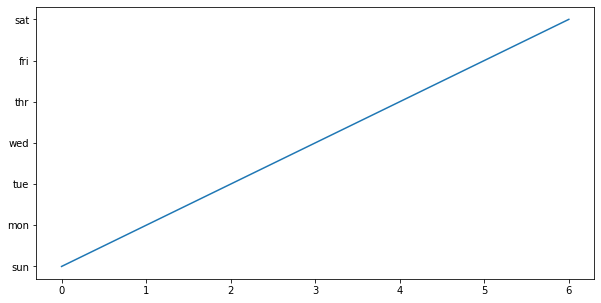

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(days)

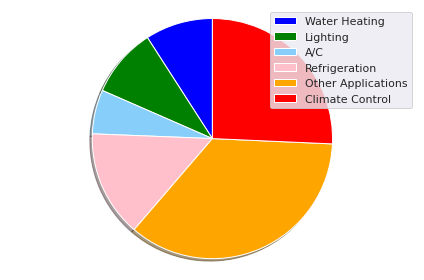

In [ ]:
import matplotlib.pyplot as plt

labels = ['Water Heating', 'Lighting', 'A/C', 'Refrigeration','Other Applications','Climate Control']
sizes = [9.2, 9.45, 6, 14.5, 36.0, 26]
colors = ['blue', 'green', 'lightskyblue', 'pink','orange','red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
LSTM =['9.2', '9.45', '6', '14.5', '36.0', '26']

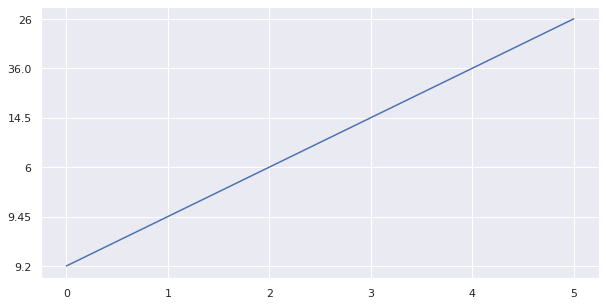

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(LSTM)